# Drafting the prototype of what will be a module for adding filtered version of the image


In [6]:
%matplotlib inline

In [22]:
import matplotlib.pyplot as plt
import numpy as np

image = np.zeros((7, 7), dtype=float)
image[2:5, 2:5] = 1
image = image.astype(np.uint16)

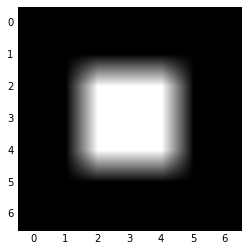

In [23]:
plt.imshow(image,cmap='gray');

In [19]:
from skimage.morphology import disk
from skimage.filters.rank import mean
#image = data.camera().astype(np.uint16)
image = mean(image, disk(20), s0=10,s1=10)

TypeError: mean() got an unexpected keyword argument 's0'

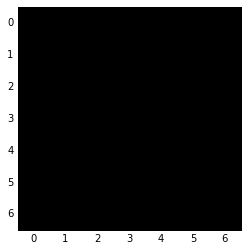

In [25]:
from skimage.filters.rank import noise_filter
out = noise_filter(image, disk(2))
plt.imshow(out,cmap='gray');